<a href="https://colab.research.google.com/github/EmircanDogan/globalai-project/blob/main/hw2_netflixPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('/content/NetflixOriginals.csv',encoding = 'ISO-8859-1')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


# Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.


In [9]:
#En Uzun süreli filmlerden 100 adet listelenmesi
runtime_film = df[["Language", "Title", "Genre", "Premiere","Runtime", "IMDB Score"]].sort_values(["Runtime"], ascending=False).head(100)

In [10]:
#Dillere Göre Ortalama Film Süresi
lang_film = runtime_film.groupby("Language")["Runtime"].mean()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

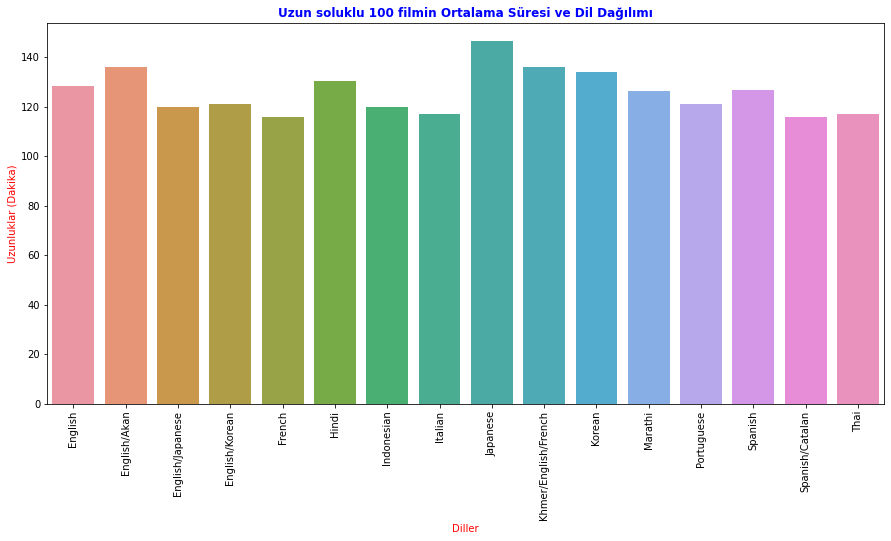

In [11]:
plt.figure(figsize=(15,7))
sns.barplot(x=lang_film.index, y=lang_film.values)
plt.title("Uzun soluklu 100 filmin Ortalama Süresi ve Dil Dağılımı",weight='bold',color="blue")
plt.ylabel("Uzunluklar (Dakika)",color="red")
plt.xlabel("Diller",color="red")
plt.xticks(rotation=90)  

# 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [12]:
df["Date"] = pd.to_datetime(df.Premiere)
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["day_of_week"] = df["Date"].dt.dayofweek
df["Year_Month"] = df["Date"].dt.strftime("%Y-%m")

In [13]:
#Verilen Tarihler Arasından Belgesel Türündeki Verinin çekilmesi
doc_film = df[(df['Date'] > '2019-01-01') & (df['Date'] <= '2020-06-30') & (df["Genre"]=="Documentary")]

Text(0.5, 1.0, '2019 Ocak 2020 Haziran Arası Documentary Türünde çekilen filmlerin IMDB Puanları')

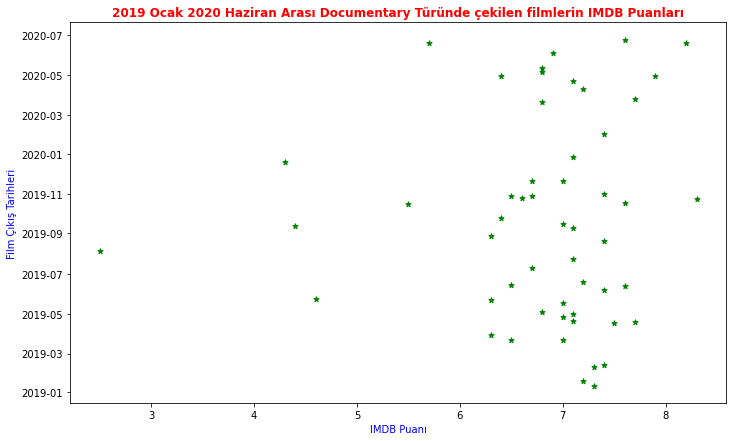

In [14]:
fig =plt.figure(figsize = (40,7))
first_plot = fig.add_subplot(1,3,1)
first_plot.scatter(doc_film["IMDB Score"],doc_film["Date"],label= "stars", color= "green", 
            marker= "*", s=30)
plt.xlabel('IMDB Puanı',color="blue")
plt.ylabel('Film Çıkış Tarihleri',color="blue")
first_plot.set_title("2019 Ocak 2020 Haziran Arası Documentary Türünde çekilen filmlerin IMDB Puanları",color="red",weight='bold')

# İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [15]:
#İngilizce Olan filmleri listeledik
language_eng=df[(df["Language"] == "English")]

In [16]:
#IMDB puanına göre sıralayıp en yüksek ımdb puanına sahip filmi seçtik
language_eng[["IMDB Score", "Title", "Genre", "Language"]].sort_values(["IMDB Score"], ascending=False).head(1)

,IMDB Score,Title,Genre,Language
583,9.0,David Attenborough: A Life on Our Planet,Documentary,English


#  'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.


Question 10
Which are the top 10 movies with the highest 'Runtime' value? Visualize it.

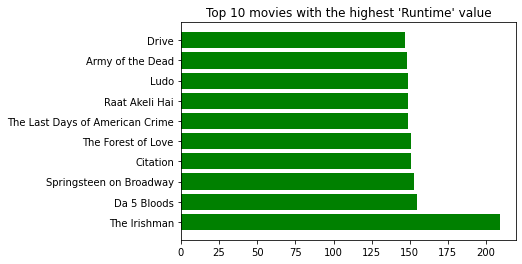

In [17]:
#  Top 10 movies with the highest 'Runtime' value
highestRuntime = df.nlargest(n=10, columns=['Runtime'])
y = highestRuntime["Title"]
x = highestRuntime["Runtime"]
plt.barh(y,x, color = "green")
plt.title("Top 10 movies with the highest 'Runtime' value")
plt.show()

# Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.


Question 11
In which year was the most movies released? Visualize it.

Slicing the releasing year data to an extra column

In [18]:
df['Release Year'] = df['Premiere'].str.slice(-4)

In [19]:
mostMovieRelease = df["Release Year"].value_counts().nlargest(n=10)

In [20]:
mostMovieRelease2 = pd.DataFrame(mostMovieRelease)
mostMovieRelease2 ["Release Year"]

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Release Year, dtype: int64

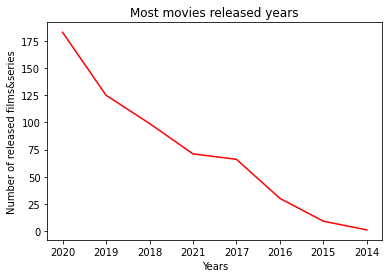

In [21]:
mostMovieRelease.plot(color = "red", title = "Most movies released years", xlabel = "Years", ylabel = "Number of released films&series")

# Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir?
Görselleştiriniz.



Question 12
which films released in which language have the lowest average IMBD score?
Visualize it.

In [23]:
lowest_ımdb = df.nsmallest(n=10, columns=['IMDB Score'])
low_ımdb_langs = lowest_ımdb["Language"]
lowest_ımdb["IMDB Score"]
lowest_ımdb

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date,Year,Month,day_of_week,Year_Month,Release Year
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,2019,8,0,2019-08,2019
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21,2020,8,4,2020-08,2020
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26,2019,12,3,2019-12,2019
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19,2018,1,4,2018-01,2018
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30,2020,10,4,2020-10,2020
5,Drive,Action,"November 1, 2019",147,3.5,Hindi,2019-11-01,2019,11,4,2019-11,2019
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish,2020-12-04,2020,12,4,2020-12,2020
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English,2020-06-05,2020,6,4,2020-06,2020
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English,2018-03-23,2018,3,4,2018-03,2018
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi,2021-05-18,2021,5,1,2021-05,2021


Find the film languages which have lowest IMDB scores 

In [24]:
df3= lowest_ımdb.pivot_table(columns=['Language'], aggfunc='size') 
df3

Language
English             3
English/Japanese    1
Hindi               3
Italian             1
Spanish             1
Turkish             1
dtype: int64

In [25]:
df3.to_frame()

,0
Language,
English,3
English/Japanese,1
Hindi,3
Italian,1
Spanish,1
Turkish,1


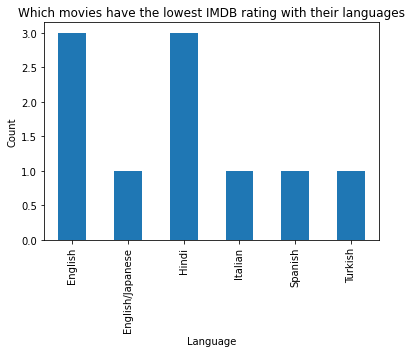

In [26]:
 # Which language movies have the lowest IMDB rating?
fig, ax = plt.subplots()
ax.set_title('Which movies have the lowest IMDB rating with their languages')
ax.set_ylabel('Count')
lowestIMDBlangs = df3.groupby("Language").mean().plot.bar();

Text(0, 0.5, '')

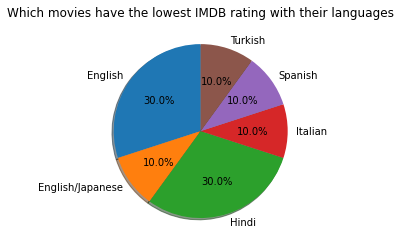

In [27]:
# Movies have the lowest IMDB rating with their languages 
a = df3.groupby("Language").mean().plot.pie(autopct='%1.1f%%',shadow=True, startangle=90);
plt.title("Which movies have the lowest IMDB rating with their languages")
plt.ylabel("")